# **The Wine Recognition Dataset**

This dataset is also known as the "Wine Recognition Dataset" and it's a well-known dataset in the field of machine learning and pattern recognition. Here's a brief overview of its history and characteristics:

1. **Origin**: The Wine dataset was created by R.A. Fisher, a British statistician and biologist, and it was originally used in his 1936 paper "The Use of Multiple Measurements in Taxonomic Problems". The dataset was later donated to the UCI Machine Learning Repository.

2. **Purpose**: The dataset was collected for the analysis of the chemical constituents found in three types of wines grown in the same region in Italy but derived from three different cultivars.

3. **Features**: The dataset comprises 13 different measurements taken from the analysis of constituents found in the three types of wine. These features include alcohol, malic acid, ash, alcalinity of ash, magnesium, total phenols, flavanoids, nonflavanoid phenols, proanthocyanins, color intensity, hue, OD280/OD315 of diluted wines, and proline.

4. **Classes**: The dataset contains three classes, corresponding to the three different types of wine. Each class has a different number of observations, but in total, there are 178 instances in the dataset.

5. **Usage in Machine Learning**: The Wine dataset is commonly used for classification and clustering tasks to demonstrate various techniques in machine learning, particularly for multiclass classification. It serves as a good example for algorithms that can handle multiple features and classes.

6. **Significance**: The dataset is significant due to its historical importance and its continued use in the field of machine learning as a benchmark for various algorithms.

The Wine dataset's simplicity and clear structure make it an excellent resource for teaching and learning machine learning concepts, especially for tasks involving classification and clustering.

# **Step 1: Import Libraries and Load the Dataset**

In [ ]:
import pandas as pd

wine_df = pd.read_csv('/content/wine.csv')  # Adjust the path if necessary


# **Step 2: Data Preprocessing**

In [ ]:
wine_features = wine_df.drop('Wine', axis=1)


# **Step 3: Standardizing the Features**

In [ ]:
# Importing the pandas library
import pandas as pd

# Step 1: Load the dataset
wine_df = pd.read_csv('/content/wine.csv')  # Make sure this path is correct

# Step 2: Data Preprocessing
# Dropping the 'Wine' column
wine_features = wine_df.drop('Wine', axis=1)

# The rest of your code for standardizing the features and applying K-Means
# ...


# **Step 4: Applying K-Means Clustering**

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Step 1: Data Preprocessing
# Dropping the 'Wine' column
wine_features = wine_df.drop('Wine', axis=1)

# Standardizing the features
scaler = StandardScaler()
wine_scaled = scaler.fit_transform(wine_features)

# Step 2: Applying K-Means Clustering
# Using K=3 for clustering
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)

kmeans.fit(wine_scaled)

KMeans(n_clusters=3, n_init=10, random_state=42)

# **Step 5: Comparing Clusters with Labels**

In [ ]:
# Step 3: Comparing Clusters with Labels
# Adding cluster labels to the original dataframe for comparison
wine_df['cluster'] = kmeans.labels_

# Comparing the clusters with the wine labels
comparison = pd.crosstab(wine_df['Wine'], wine_df['cluster'])
print(comparison)

cluster   0   1   2
Wine               
1         0  59   0
2         3   3  65
3        48   0   0


To better grasp what the code is doing follow the following explanations:


**1.**  **Applying PCA to Reduce Dimensions to 2D:**

*   PCA (Principal Component Analysis): This is a technique used to reduce the number of dimensions in your data. In simpler terms, it takes all your features (like alcohol level, acidity, etc., in the wine dataset) and condenses them into just a few new features that still represent most of the important information.

*   PCA(n_components=2): Here, we're telling PCA to shrink the data down to just 2 dimensions (features). This makes it easier to visualize the data on a 2D plot (like a flat chart) while still capturing the essence of the original data.

**2.** **Transforming the Scaled Wine Data:**
- fit_transform(wine_scaled): This part takes the standardized wine data and applies the PCA transformation we just set up. 'Fit' means PCA is learning the patterns in the data, and 'transform' means it's creating the new 2D version of your data.


**3.  Adding PCA Components to the DataFrame:**

- Creating New Columns for PCA Components: After transforming the data, we get two new columns (PCA1 and PCA2), which are our new 2D version of the dataset. We add these columns to wine_df, so we can see how each wine sample looks in this new 2D space.

**4. Plotting the Clusters:**

-  Creating a Scatter Plot: We use a scatter plot to visualize our data. Each point on the plot represents a wine sample.
sns.scatterplot: This is a function from the seaborn library that makes creating scatter plots easy. We tell it to plot our new PCA1 and PCA2 columns on the x-axis and y-axis.
Coloring by 'cluster': We color the points based on the cluster they belong to. This helps us see if wines that are similar (in their original 13-dimensional space) are also close together in this new 2D space.

The overall goal here is to take a complex dataset with many features and simplify it into a 2D form that we can easily visualize, while still preserving the patterns and relationships between the data points. This visualization helps us understand how well the K-Means clustering algorithm has grouped the wines based on their similarities.

# **Visualization of Wine Clusters using PCA and Scatter Plot**

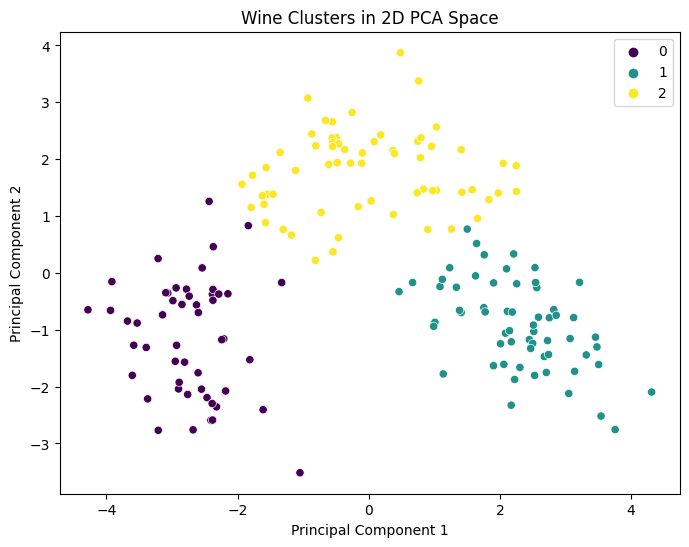

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Applying PCA to reduce dimensions to 2D
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_scaled)

# Adding PCA components to the dataframe
wine_df['PCA1'] = wine_pca[:, 0]
wine_df['PCA2'] = wine_pca[:, 1]

# Plotting the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=wine_df, palette='viridis')
plt.title('Wine Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()
